<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
# open the original csv file

data = []
sat_scores = '../Project-2/sat_scores.csv'
with open(sat_scores, 'r') as f:
    rows= f.readlines()
    for row in rows:
        data.append(row)

In [3]:
# check the list
sat_scores_list = [row.split() for row in data]
sat_scores_list

[['State,Rate,Verbal,Math'],
 ['CT,82,509,510'],
 ['NJ,81,499,513'],
 ['MA,79,511,515'],
 ['NY,77,495,505'],
 ['NH,72,520,516'],
 ['RI,71,501,499'],
 ['PA,71,500,499'],
 ['VT,69,511,506'],
 ['ME,69,506,500'],
 ['VA,68,510,501'],
 ['DE,67,501,499'],
 ['MD,65,508,510'],
 ['NC,65,493,499'],
 ['GA,63,491,489'],
 ['IN,60,499,501'],
 ['SC,57,486,488'],
 ['DC,56,482,474'],
 ['OR,55,526,526'],
 ['FL,54,498,499'],
 ['WA,53,527,527'],
 ['TX,53,493,499'],
 ['HI,52,485,515'],
 ['AK,51,514,510'],
 ['CA,51,498,517'],
 ['AZ,34,523,525'],
 ['NV,33,509,515'],
 ['CO,31,539,542'],
 ['OH,26,534,439'],
 ['MT,23,539,539'],
 ['WV,18,527,512'],
 ['ID,17,543,542'],
 ['TN,13,562,553'],
 ['NM,13,551,542'],
 ['IL,12,576,589'],
 ['KY,12,550,550'],
 ['WY,11,547,545'],
 ['MI,11,561,572'],
 ['MN,9,580,589'],
 ['KS,9,577,580'],
 ['AL,9,559,554'],
 ['NE,8,562,568'],
 ['OK,8,567,561'],
 ['MO,8,577,577'],
 ['LA,7,564,562'],
 ['WI,6,584,596'],
 ['AR,6,562,550'],
 ['UT,5,575,570'],
 ['IA,5,593,603'],
 ['SD,4,577,582'],
 ['

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [4]:
# load the file in pandas format 

SAT_scores = pd.read_csv('../Project-2/sat_scores.csv')

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [5]:
# check the last five rows of the data

SAT_scores.tail(5)

,State,Rate,Verbal,Math
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551
51,All,45,506,514


In [6]:
# check the shape of the data

SAT_scores.shape

(52, 4)

In [7]:
# drop the All column

SAT_scores = SAT_scores.drop(SAT_scores.index[51])

In [8]:
# check the first ten rows of the dataframe 

SAT_scores.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [9]:
# verify the general information

SAT_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   51 non-null     object
 1   Rate    51 non-null     int64 
 2   Verbal  51 non-null     int64 
 3   Math    51 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.0+ KB


In [10]:
# this dataset contains 51 rows and 4 columns after drop the All column

SAT_scores.shape

(51, 4)

In [11]:
# the name of each columns 

SAT_scores.columns

Index(['State', 'Rate', 'Verbal', 'Math'], dtype='object')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

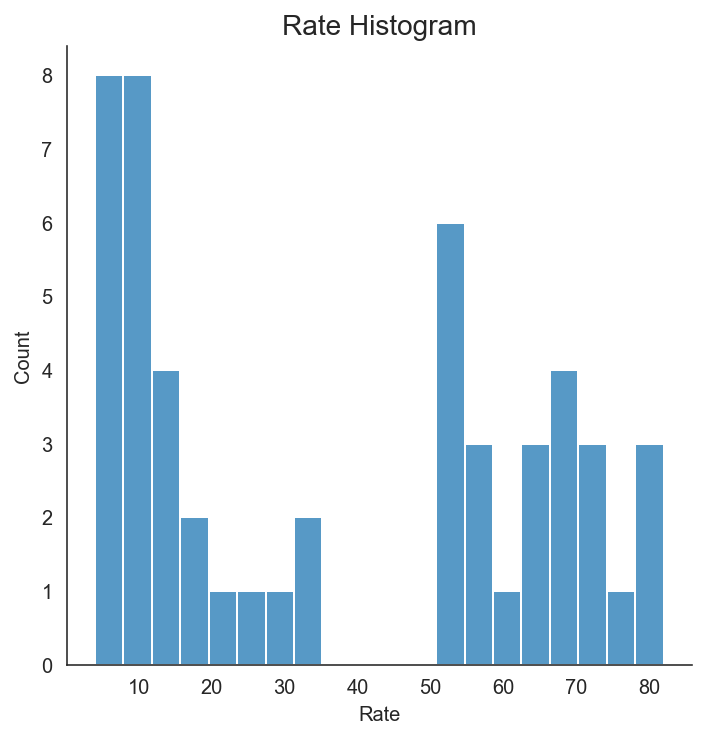

In [12]:
# plot the distributions for Rate

sns.set_style(style= 'white')

sns.displot(SAT_scores['Rate'], bins = 20)
plt.title('Rate Histogram', fontsize=14);

##### Comment: 
Rate histogram appears to be a bimodal distributions

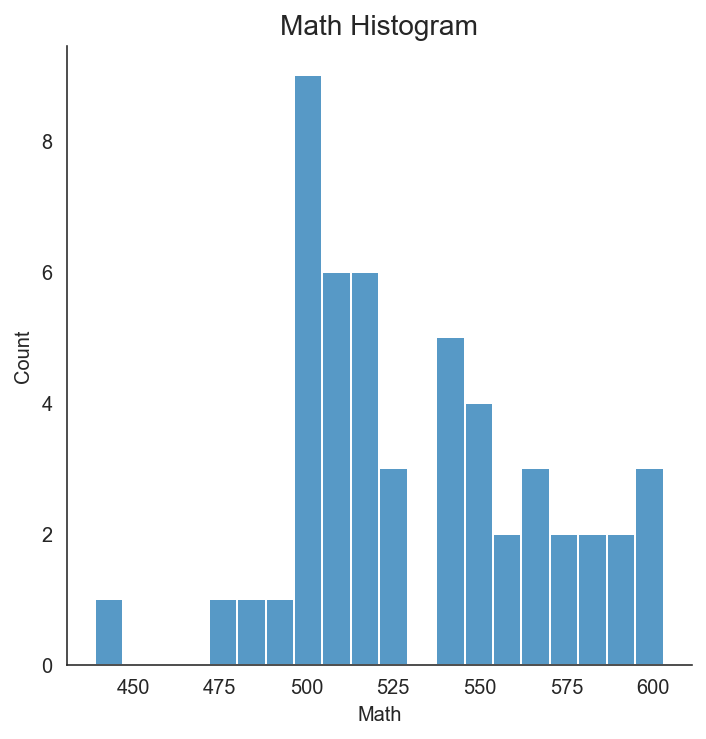

In [13]:
# plot the distributions for Math

sns.displot(SAT_scores['Math'], bins = 20)
plt.title('Math Histogram', fontsize=14);

##### Comment: 
Math have outliers (less than 450)

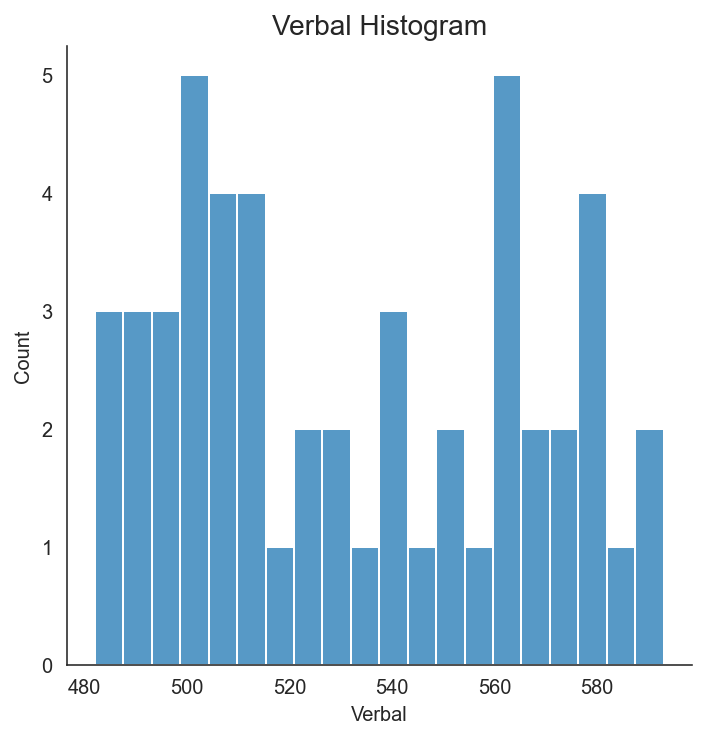

In [14]:
# plot the distributions for Rate

sns.displot(SAT_scores['Verbal'], bins = 20)
plt.title('Verbal Histogram', fontsize=14);

##### Comment: 
Verbal histogram is more evenly distributed,
but it also have bimodal distibutions with one mean around 500 and the other mean around 570

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

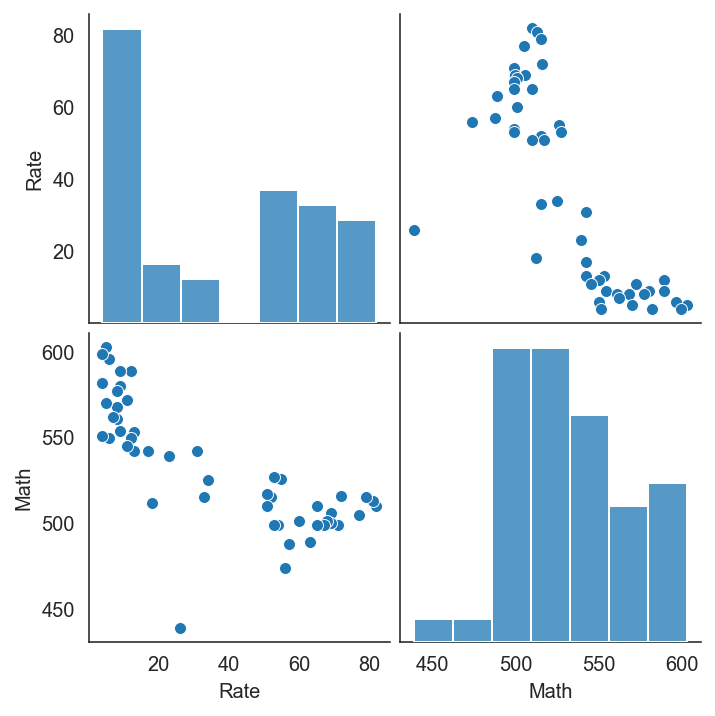

In [15]:
sns.pairplot(SAT_scores, vars= ['Rate', 'Math'])

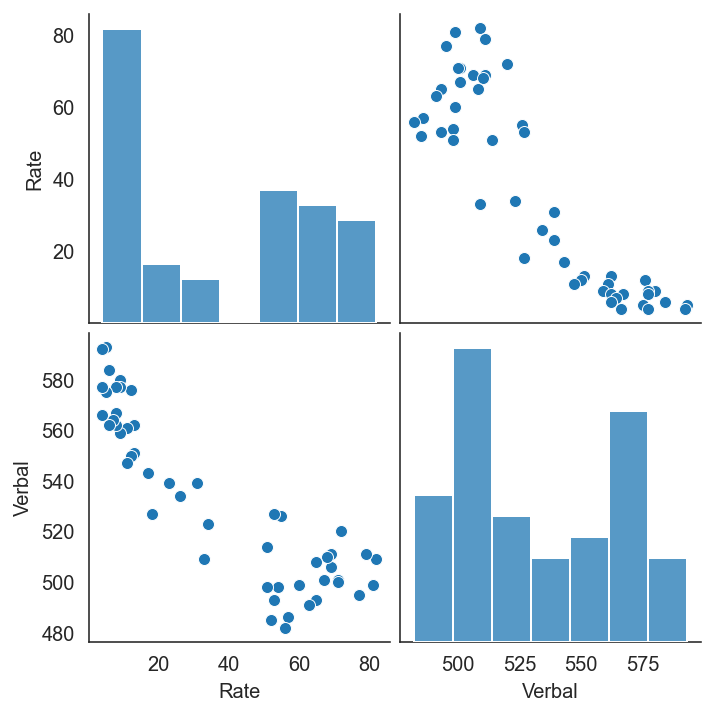

In [16]:
sns.pairplot(SAT_scores, vars= ['Rate', 'Verbal'])

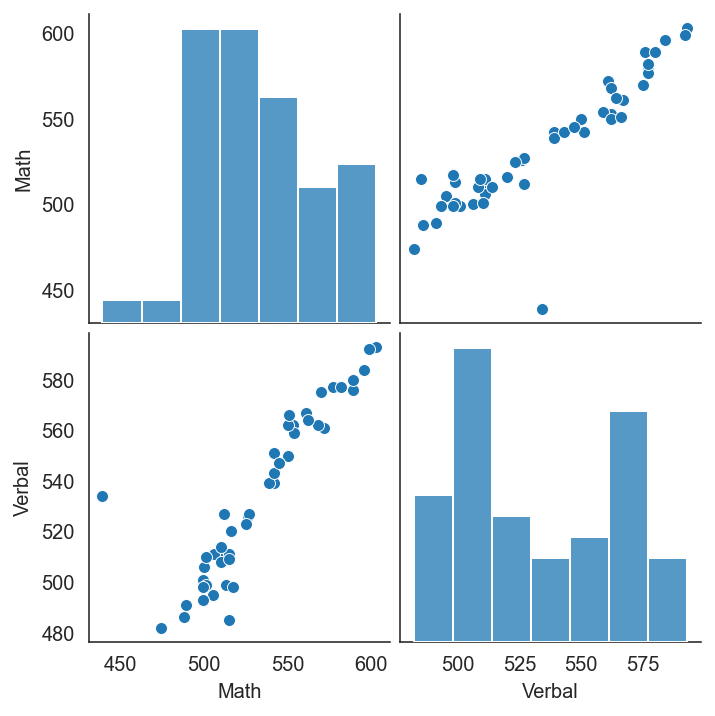

In [17]:
sns.pairplot(SAT_scores, vars= ['Math', 'Verbal'])

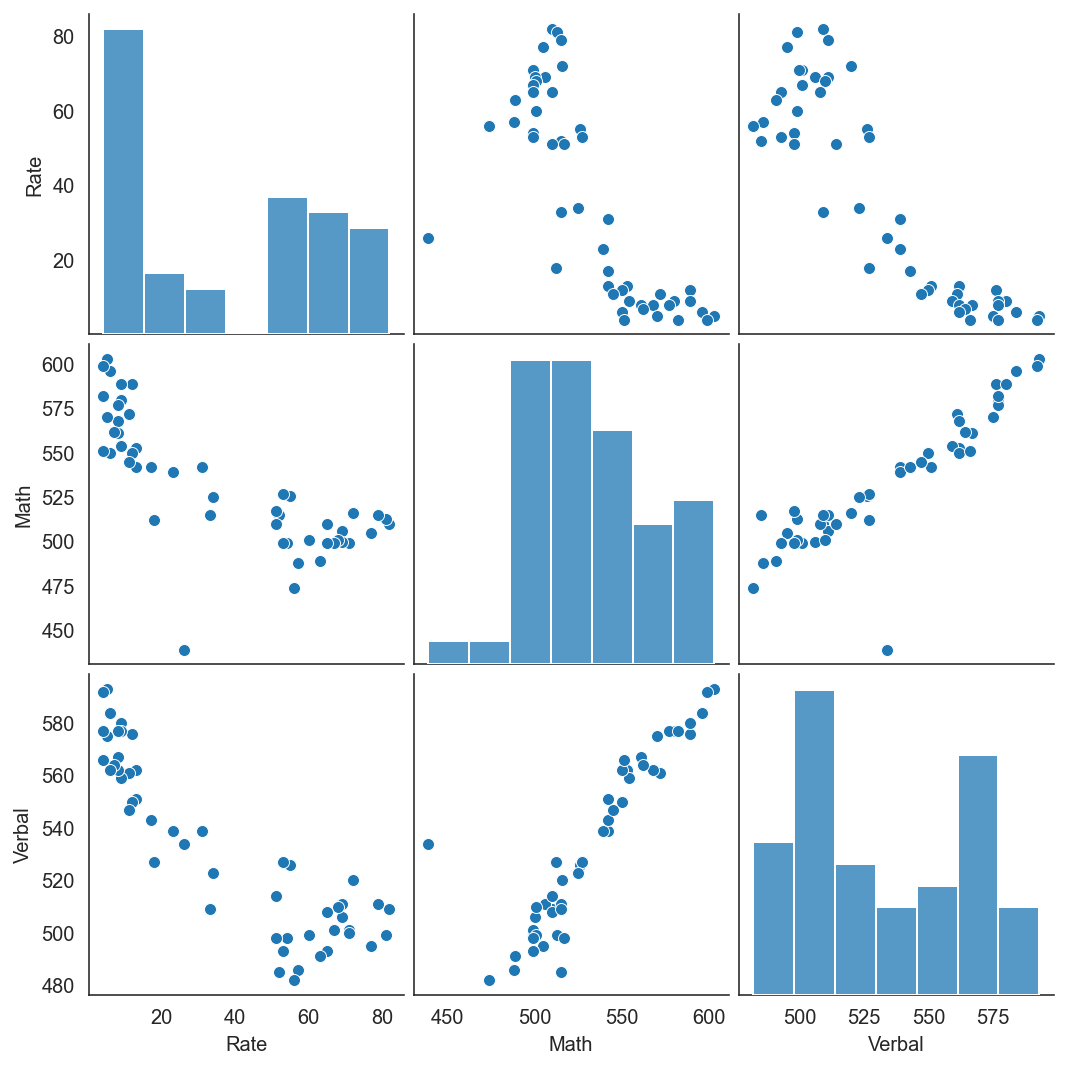

In [18]:
# joint distributions for Rate, Math and Verbal 

'''While Math and Verbal are positve correlated, 
both variables are negative correlated with Rate'''

sns.pairplot(SAT_scores, vars= ['Rate', 'Math', 'Verbal'])

##### Comment: 
Verbal histogram is more evenly distributed,
but it also have bimodal distibutions with one mean around 500 and the other mean around 570

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

Text(0.5, 1.0, 'Verbal VS Math')

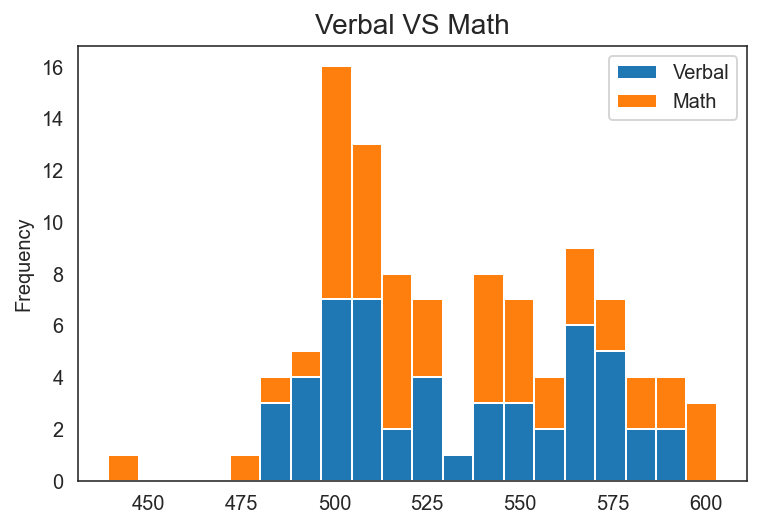

In [19]:
# Stacked Math histogram over Verbal histogram 

SAT_scores[['Verbal','Math']].plot(kind='hist',stacked =True, bins = 20)

plt.title('Verbal VS Math',fontsize=14)

##### Comment: 
Math have wider distribution and outliers in comparision to Verbal 

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

Text(0.5, 1.0, 'Boxplot of Verbal and Math')

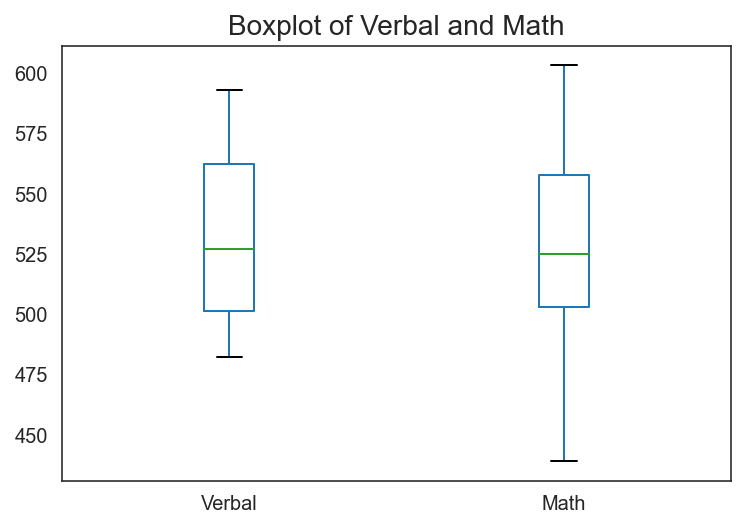

In [20]:
# boxplot of Verbal and Math

Verbal_Math = SAT_scores[['Verbal', 'Math']]
Verbal_Math.plot(kind ='box')
plt.title('Boxplot of Verbal and Math', fontsize=14)

Text(0.5, 1.0, 'Boxplot of Verbal, Math and Rate')

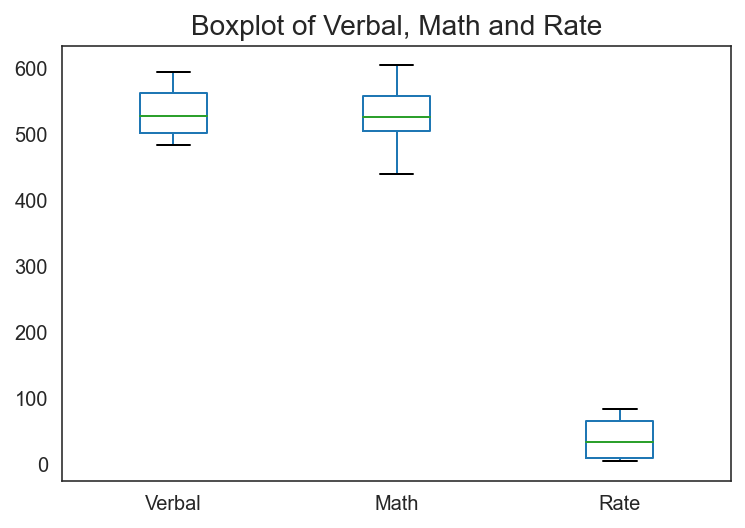

In [21]:
# boxplot of original data for Verbal, Math and Rate

Verbal_Math_Rate = SAT_scores[['Verbal', 'Math','Rate']]

Verbal_Math_Rate.plot(kind ='box')
plt.title('Boxplot of Verbal, Math and Rate', fontsize=14)

##### Comment: 
While Verbal and Math have similar mean(around 525), the distribution for Math is wider than that of Verbal, 
and Math is more likely to have outliers.

As compared to a scatterplot or a histogram, boxplot is easy to visualize center, spread, and the outlier of simple statical values of the data. 

While plotting a box-plot of Rate on the same chart as Math and Verbal, because the range for Rate is all under 100 while the dataset for Math and Verbal is greater than 500, so it is meaningless to compare the statistical values unless they are normalised. 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [22]:
# standardize the Verbal, Math and Rate values 

Verbal_Math_Rate = (Verbal_Math_Rate- Verbal_Math_Rate.mean())/Verbal_Math_Rate.std()
Verbal_Math_Rate.head()

,Verbal,Math,Rate
0,-0.705304,-0.601948,1.633353
1,-1.005058,-0.519275,1.597057
2,-0.645353,-0.464159,1.524463
3,-1.124960,-0.739737,1.451870
4,-0.375574,-0.436602,1.270386


<AxesSubplot:>

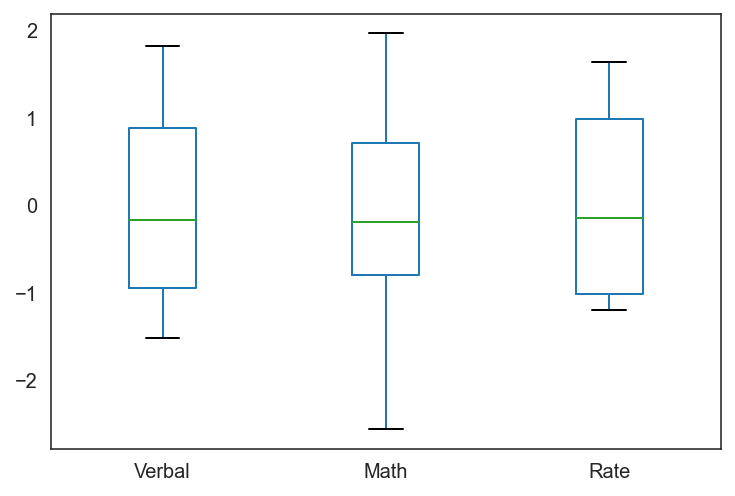

In [23]:
# boxplot of standardized data for Verbal, Math and Rate

Verbal_Math_Rate.plot(kind ='box')

##### Comment: 

All three variables have similar mean around 0, while Math have wider distribution and narrower IQR in comparision to Verbal and Rate variables, indicating that Math is more likely to have outliers. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [24]:
# find the mean for Verbal 

Verbal_mean = SAT_scores['Verbal'].mean()
Verbal_mean

532.5294117647059

In [25]:
# check how many states are above the mean

Verbal_above_mean = SAT_scores.loc[SAT_scores['Verbal'] > Verbal_mean]
Verbal_above_mean.head()

,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553


In [26]:
print('There are ' + str(len(Verbal_above_mean)) + ' states are above the mean ' + str(Verbal_mean) + '.')

There are 24 states are above the mean 532.5294117647059.


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [27]:
# find the median for Verbal 

Verbal_median = SAT_scores['Verbal'].median()
Verbal_median

527.0

In [28]:
# check how many states are above the median

Verbal_above_median = SAT_scores.loc[SAT_scores['Verbal'] > Verbal_median]
Verbal_above_median.head()

,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553


In [29]:
print('There are ' + str(len(Verbal_above_median)) + ' states are above the median ' + str(Verbal_median) + '.')

There are 24 states are above the median 527.0.


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [11]:
# add a column showing the difference of Verbal - Math

SAT_scores['diff_verbal_math'] = SAT_scores['Verbal'] - SAT_scores['Math']
SAT_scores.head(10)

,State,Rate,Verbal,Math,diff_verbal_math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4
5,RI,71,501,499,2
6,PA,71,500,499,1
7,VT,69,511,506,5
8,ME,69,506,500,6
9,VA,68,510,501,9


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [31]:
# sort the values where Verbal is greater than Math in ascending order

SAT_scores.sort_values('diff_verbal_math', inplace=True, ascending = 0)

SAT_scores.head(10)

,State,Rate,Verbal,Math,diff_verbal_math
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15
45,AR,6,562,550,12
31,TN,13,562,553,9
9,VA,68,510,501,9
32,NM,13,551,542,9
16,DC,56,482,474,8
8,ME,69,506,500,6
41,OK,8,567,561,6


In [32]:
# show the values where Math is greater than Verbal 

SAT_scores['diff_math_verbal'] = SAT_scores['Math'] - SAT_scores['Verbal']
SAT_scores.sort_values('diff_math_verbal', inplace = True, ascending = False)

SAT_scores.head(3)

,State,Rate,Verbal,Math,diff_verbal_math,diff_math_verbal
21,HI,52,485,515,-30,30
23,CA,51,498,517,-19,19
1,NJ,81,499,513,-14,14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


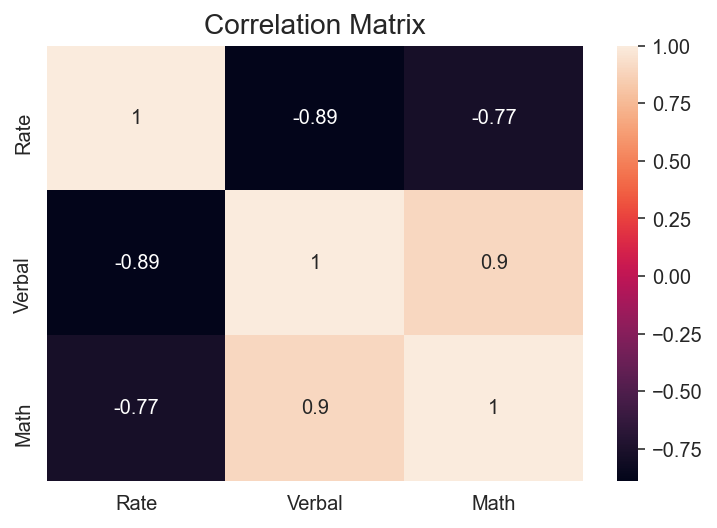

In [33]:
# Correlation matrix for Rate, Verbal and Math

heatmap_variables = SAT_scores[['Rate', 'Verbal', 'Math']]


sns.heatmap(heatmap_variables.corr(), annot=True)
plt.title('Correlation Matrix', fontsize=14);

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [34]:
SAT_scores.Rate.describe()

count    51.000000
mean     37.000000
std      27.550681
min       4.000000
25%       9.000000
50%      33.000000
75%      64.000000
max      82.000000
Name: Rate, dtype: float64

In [35]:
SAT_scores.Verbal.describe()

count     51.000000
mean     532.529412
std       33.360667
min      482.000000
25%      501.000000
50%      527.000000
75%      562.000000
max      593.000000
Name: Verbal, dtype: float64

In [36]:
SAT_scores.Math.describe()

count     51.000000
mean     531.843137
std       36.287393
min      439.000000
25%      503.000000
50%      525.000000
75%      557.500000
max      603.000000
Name: Math, dtype: float64

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

##### 1.Describe how the covariance matrix is different from the correlation matrix.
Covariance shows the direction of the linear relationship between variables. on the other hand, correlation measures both the strength and direction of the linear relationship between two variables. Correlation is a function of the covariance and the function is Correlation = Covariance / Standard Deviation. 
Correlation between 0-1, while covariance can be any range. 

##### 2. What is the process to convert the covariance into the correlation?
Correlation = Covariance / Standard Deviation. 

##### 3.Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

The correlation matrix is the standardized version of the covariance matrix. Because the correlation is the standardized form of the matrix, so even the variables meansured in different scales will not have impact on the data analysis. 

In [37]:
covariance = heatmap_variables.cov()
covariance

,Rate,Verbal,Math
Rate,759.04,-816.280000,-773.220000
Verbal,-816.28,1112.934118,1089.404706
Math,-773.22,1089.404706,1316.774902


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [38]:
# import csv file 

drug_use_by_age = pd.read_csv('../Project-2/drug-use-by-age.csv')

In [39]:
# show the first five rows of the data

drug_use_by_age.head().T

,0,1,2,3,4
age,12,13,14,15,16
n,2798,2757,2792,2956,3058
alcohol-use,3.9,8.5,18.1,29.2,40.1
alcohol-frequency,3,6,5,6,10
marijuana-use,1.1,3.4,8.7,14.5,22.5
marijuana-frequency,4,15,24,25,30
cocaine-use,0.1,0.1,0.1,0.5,1
cocaine-frequency,5.0,1.0,5.5,4.0,7.0
crack-use,0,0,0,0.1,0
crack-frequency,-,3.0,-,9.5,1.0


In [40]:
# check all the columns 

drug_use_by_age.columns

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object')

In [41]:
# check data types

drug_use_by_age.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

In [42]:
# check the age column

drug_use_by_age.age

0        12
1        13
2        14
3        15
4        16
5        17
6        18
7        19
8        20
9        21
10    22-23
11    24-25
12    26-29
13    30-34
14    35-49
15    50-64
16      65+
Name: age, dtype: object

In [43]:
# update the age range to floats 

age_modified = {
    '12': 12,
    '13': 13,
    '14': 14,
    '15': 15,
    '16': 16,
    '17': 17,
    '18': 18,
    '19': 19,
    '20': 20,
    '21': 21,
    '22-23': 22.5,
    '24-25': 24.5,
    '26-29': 27.5,
    '30-34': 32,
    '35-49': 42,
    '50-64': 57,
    '65+': 65,
}

drug_use_by_age.age = drug_use_by_age.age.map(lambda x: age_modified[x])

In [44]:
# check the updated age data 

drug_use_by_age.age

0     12.0
1     13.0
2     14.0
3     15.0
4     16.0
5     17.0
6     18.0
7     19.0
8     20.0
9     21.0
10    22.5
11    24.5
12    27.5
13    32.0
14    42.0
15    57.0
16    65.0
Name: age, dtype: float64

In [45]:
# convert - to NaN 

drug_use_by_age = drug_use_by_age.applymap(lambda x: np.nan if x == '-' else float(x))

drug_use_by_age.head().T

,0,1,2,3,4
age,12.0,13.0,14.0,15.0,16.0
n,2798.0,2757.0,2792.0,2956.0,3058.0
alcohol-use,3.9,8.5,18.1,29.2,40.1
alcohol-frequency,3.0,6.0,5.0,6.0,10.0
marijuana-use,1.1,3.4,8.7,14.5,22.5
marijuana-frequency,4.0,15.0,24.0,25.0,30.0
cocaine-use,0.1,0.1,0.1,0.5,1.0
cocaine-frequency,5.0,1.0,5.5,4.0,7.0
crack-use,0.0,0.0,0.0,0.1,0.0
crack-frequency,NaN,3.0,NaN,9.5,1.0


In [46]:
# check the updated data types after the initial cleaning

drug_use_by_age.dtypes

age                        float64
n                          float64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [47]:
# obtain all frequencies from the original data and add them to a new dataframe

frequency = [col for col in drug_use_by_age.columns if 'frequency' in col]

drug_frequency = drug_use_by_age[frequency]
drug_frequency.head().T

,0,1,2,3,4
alcohol-frequency,3.0,6.0,5.0,6.0,10.0
marijuana-frequency,4.0,15.0,24.0,25.0,30.0
cocaine-frequency,5.0,1.0,5.5,4.0,7.0
crack-frequency,NaN,3.0,NaN,9.5,1.0
heroin-frequency,35.5,NaN,2.0,1.0,66.5
hallucinogen-frequency,52.0,6.0,3.0,4.0,3.0
inhalant-frequency,19.0,12.0,5.0,5.5,3.0
pain-releiver-frequency,36.0,14.0,12.0,10.0,7.0
oxycontin-frequency,24.5,41.0,4.5,3.0,4.0
tranquilizer-frequency,52.0,25.5,5.0,4.5,11.0


In [48]:
# check the statistical information of each frequencies 

drug_frequency.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol-frequency,17.0,33.352941,21.318833,3.0,10.000,48.00,52.000,52.0
marijuana-frequency,17.0,42.941176,18.362566,4.0,30.000,52.00,52.000,72.0
cocaine-frequency,16.0,7.875000,8.038449,1.0,5.000,5.25,7.250,36.0
crack-frequency,14.0,15.035714,18.111263,1.0,5.000,7.75,16.500,62.0
heroin-frequency,16.0,73.281250,70.090173,1.0,39.625,53.75,71.875,280.0
hallucinogen-frequency,17.0,8.411765,15.000245,2.0,3.000,3.00,4.000,52.0
inhalant-frequency,16.0,6.156250,4.860448,2.0,3.375,4.00,6.625,19.0
pain-releiver-frequency,17.0,14.705882,6.935098,7.0,12.000,12.00,15.000,36.0
oxycontin-frequency,16.0,14.812500,12.798275,3.0,5.750,12.00,18.125,46.0
tranquilizer-frequency,17.0,11.735294,11.485205,4.5,6.000,10.00,11.000,52.0


<AxesSubplot:>

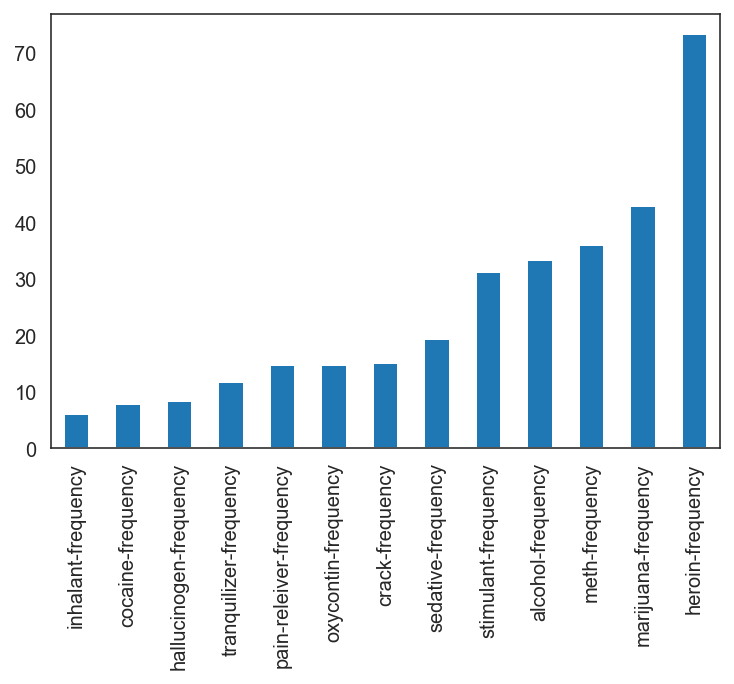

In [49]:
# check the mean of each frequencies in bar plot

drug_frequency.mean().sort_values().plot(kind='bar', figsize=(6, 4))

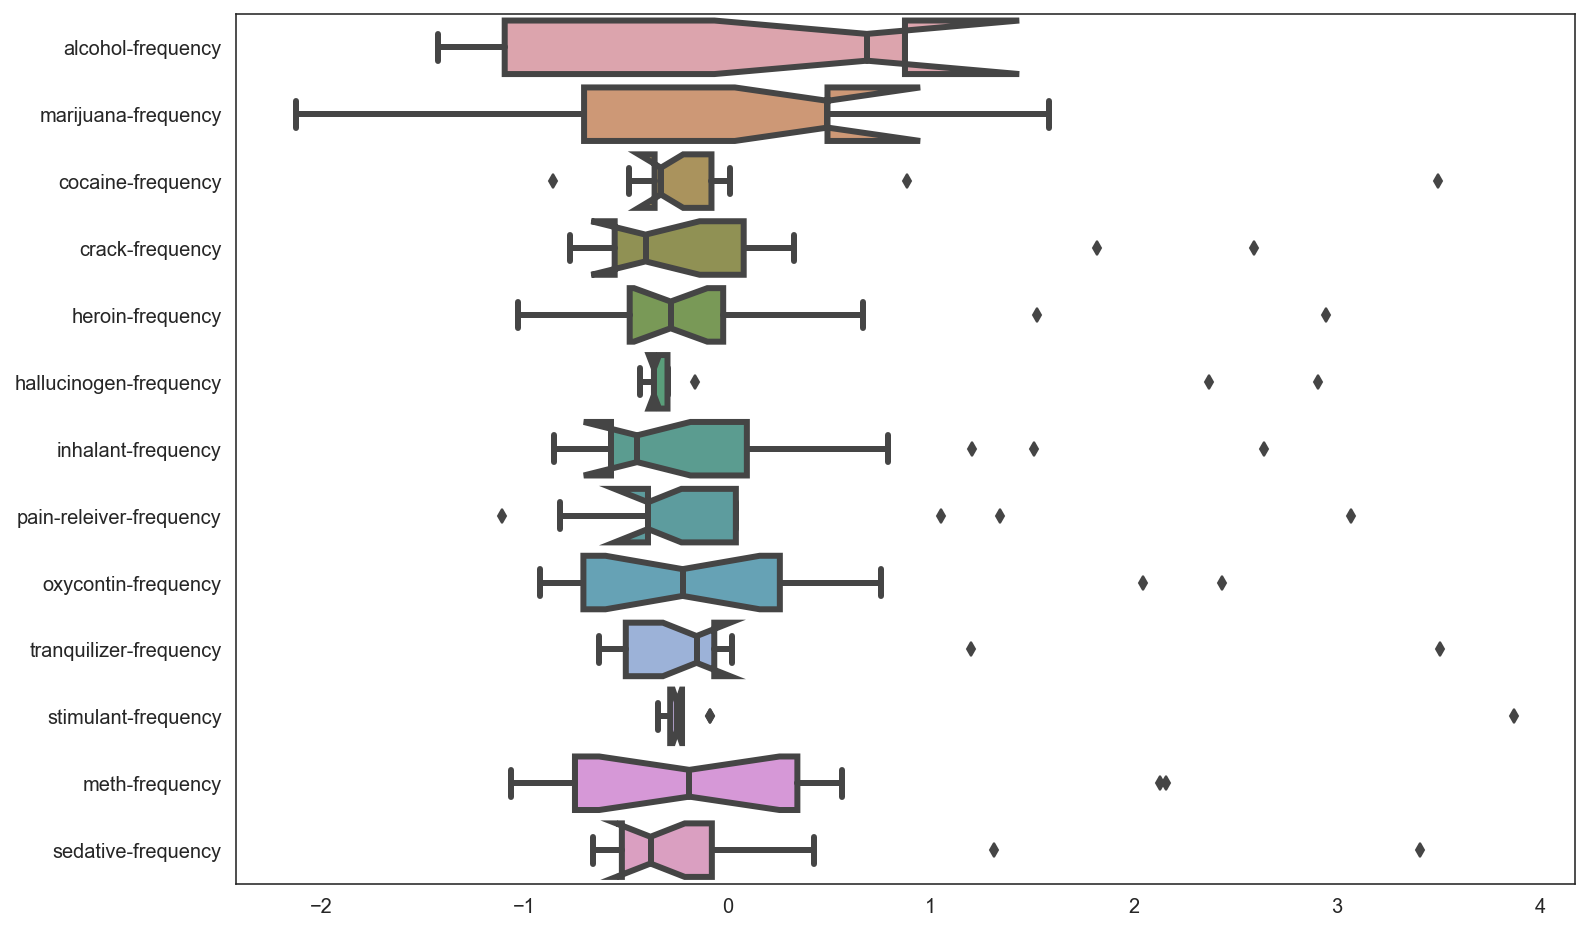

In [50]:
# standardize all frequencies and compare them in boxplot

drug_frequency = (drug_frequency - drug_frequency.mean()) / drug_frequency.std()

fig = plt.figure(figsize=(12, 8))
ax = fig.gca()

ax = sns.boxplot(data=drug_frequency, orient='h', fliersize=5, 
                 linewidth=3, notch=True, saturation=0.5, ax=ax)
plt.show()

<AxesSubplot:>

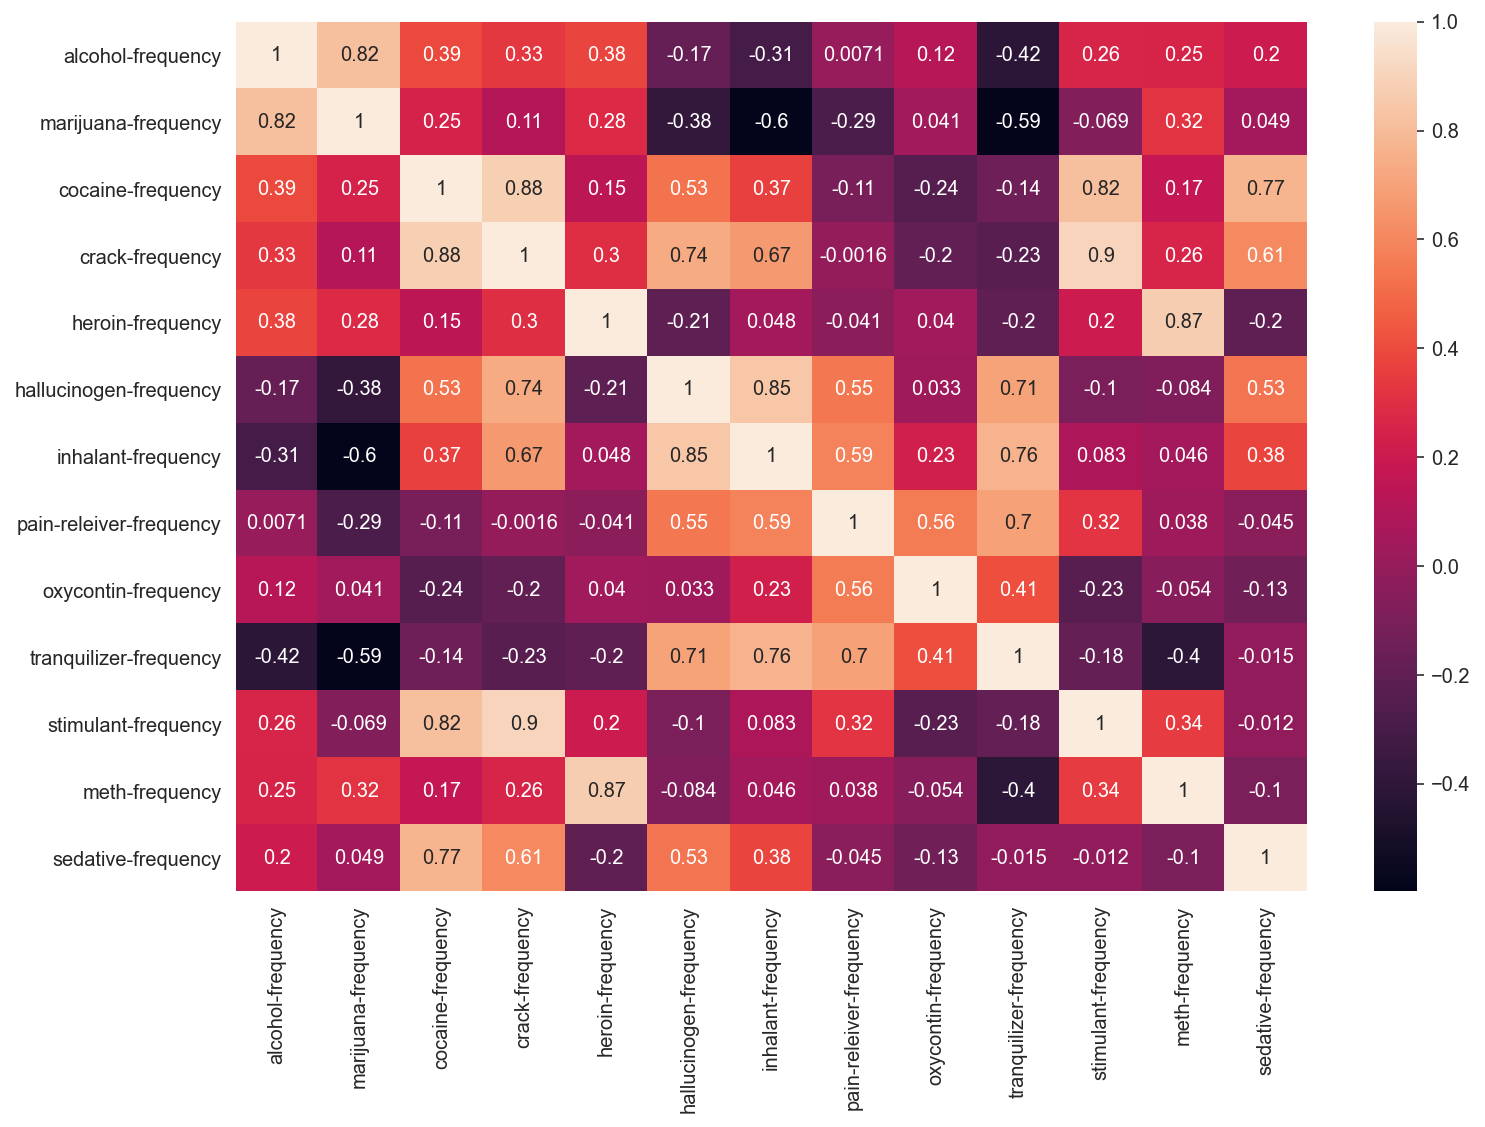

In [51]:
# check the correlations between each freuencies 

plt.figure(figsize=(12, 8)) 

sns.heatmap(drug_frequency.corr(),annot=True)

##### Comment: 

Based on the boxplot, alcohol and marijuana have the widest frequency range. The interesting note here is, although heroin and meth doesn't have the wide frequency range, they both shows a greater mean of frequency, potentially due to the addition. 

The heatmap shows the positive correlation between the frequency of alcohol and marijuana, crack and stimulant, crack and cocaine. However, there's no strong indicative of the relationship between other frequencies of drugs. 

In [52]:
# obtain all use from the original data and add them to a new dataframe

use = [col for col in drug_use_by_age.columns if 'use' in col]

drug_use = drug_use_by_age[use]
drug_use.head().T

,0,1,2,3,4
alcohol-use,3.9,8.5,18.1,29.2,40.1
marijuana-use,1.1,3.4,8.7,14.5,22.5
cocaine-use,0.1,0.1,0.1,0.5,1.0
crack-use,0.0,0.0,0.0,0.1,0.0
heroin-use,0.1,0.0,0.1,0.2,0.1
hallucinogen-use,0.2,0.6,1.6,2.1,3.4
inhalant-use,1.6,2.5,2.6,2.5,3.0
pain-releiver-use,2.0,2.4,3.9,5.5,6.2
oxycontin-use,0.1,0.1,0.4,0.8,1.1
tranquilizer-use,0.2,0.3,0.9,2.0,2.4


In [53]:
# check the statistical information of each frequencies 

drug_use.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol-use,17.0,55.429412,26.878866,3.9,40.1,64.6,77.5,84.2
marijuana-use,17.0,18.923529,11.959752,1.1,8.7,20.8,28.4,34.0
cocaine-use,17.0,2.176471,1.816772,0.0,0.5,2.0,4.0,4.9
crack-use,17.0,0.294118,0.235772,0.0,0.0,0.4,0.5,0.6
heroin-use,17.0,0.352941,0.333762,0.0,0.1,0.2,0.6,1.1
hallucinogen-use,17.0,3.394118,2.792506,0.1,0.6,3.2,5.2,8.6
inhalant-use,17.0,1.388235,0.927283,0.0,0.6,1.4,2.0,3.0
pain-releiver-use,17.0,6.270588,3.166379,0.6,3.9,6.2,9.0,10.0
oxycontin-use,17.0,0.935294,0.608216,0.0,0.4,1.1,1.4,1.7
tranquilizer-use,17.0,2.805882,1.753379,0.2,1.4,3.5,4.2,5.4


<AxesSubplot:>

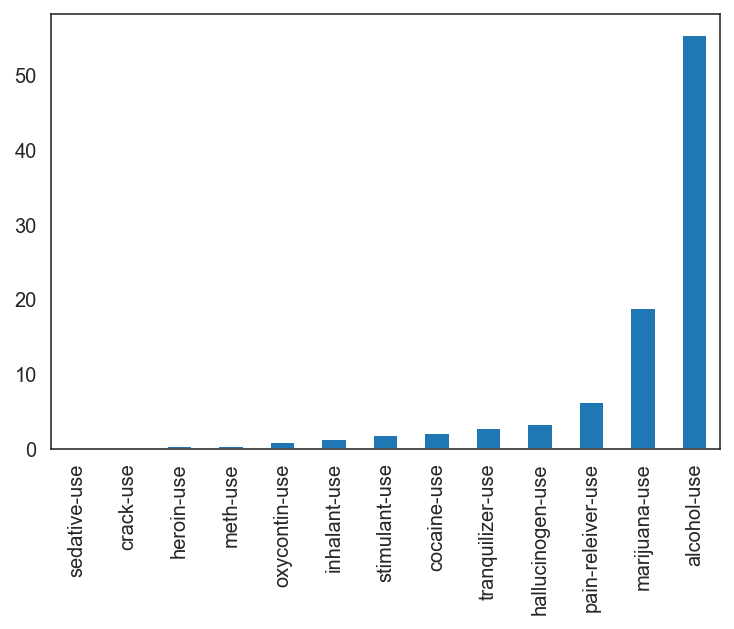

In [54]:
# check the mean of each use 

drug_use.mean().sort_values().plot(kind='bar', figsize=(6, 4))

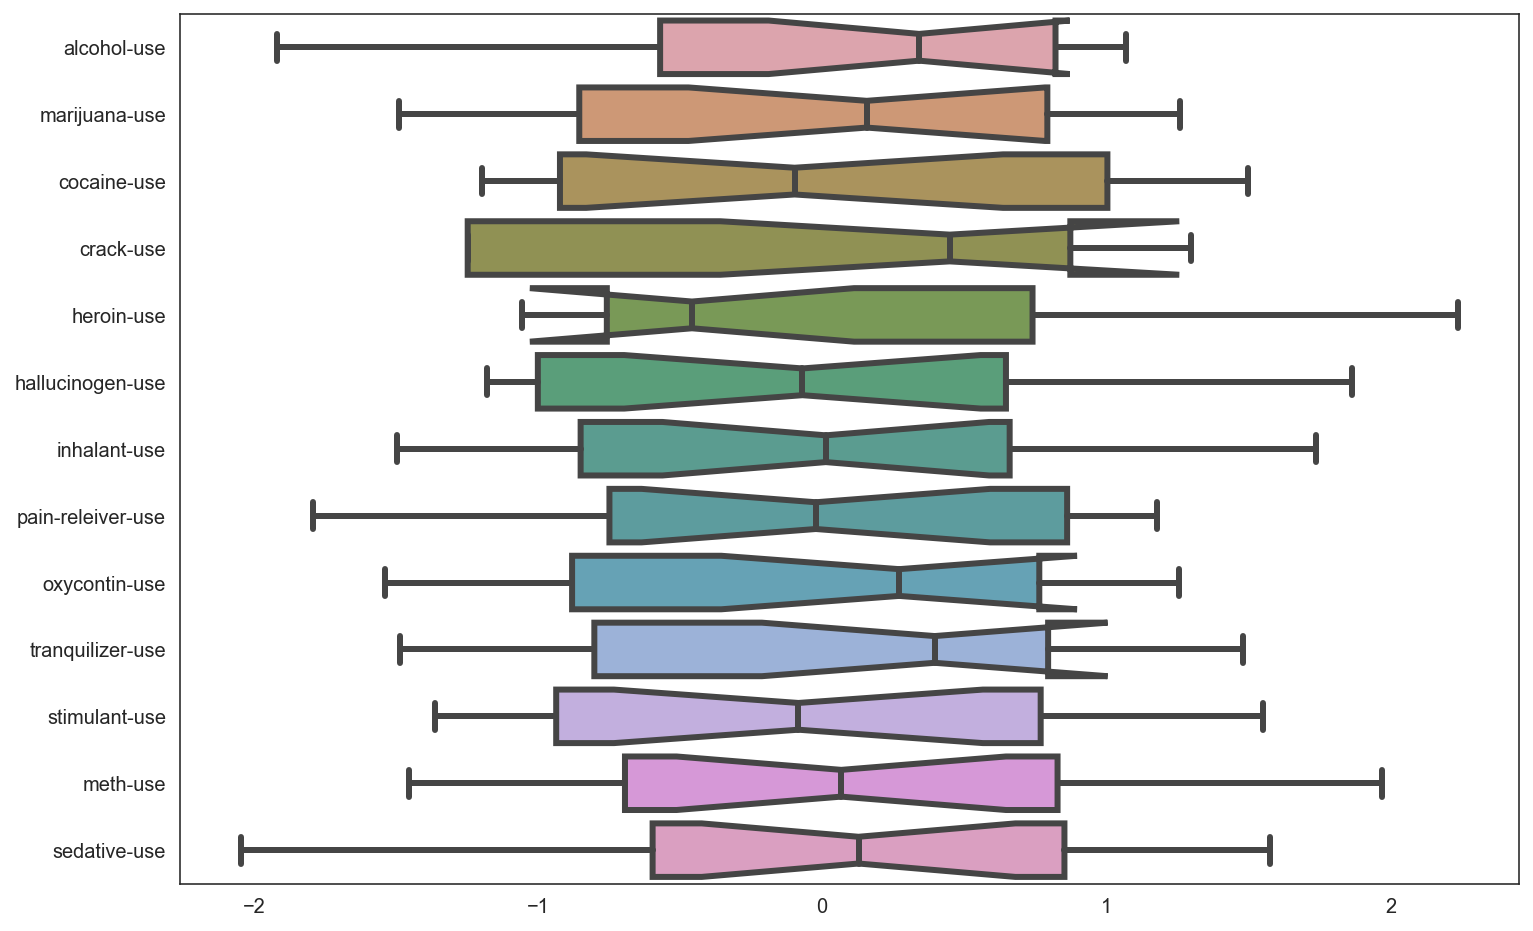

In [55]:
# standardize all use and compare them in boxplot


drug_use = (drug_use - drug_use.mean()) / drug_use.std()

fig = plt.figure(figsize=(12, 8))
ax = fig.gca()

ax = sns.boxplot(data=drug_use, orient='h', fliersize=5, 
                 linewidth=3, notch=True, saturation=0.5, ax=ax)
plt.show()

<AxesSubplot:>

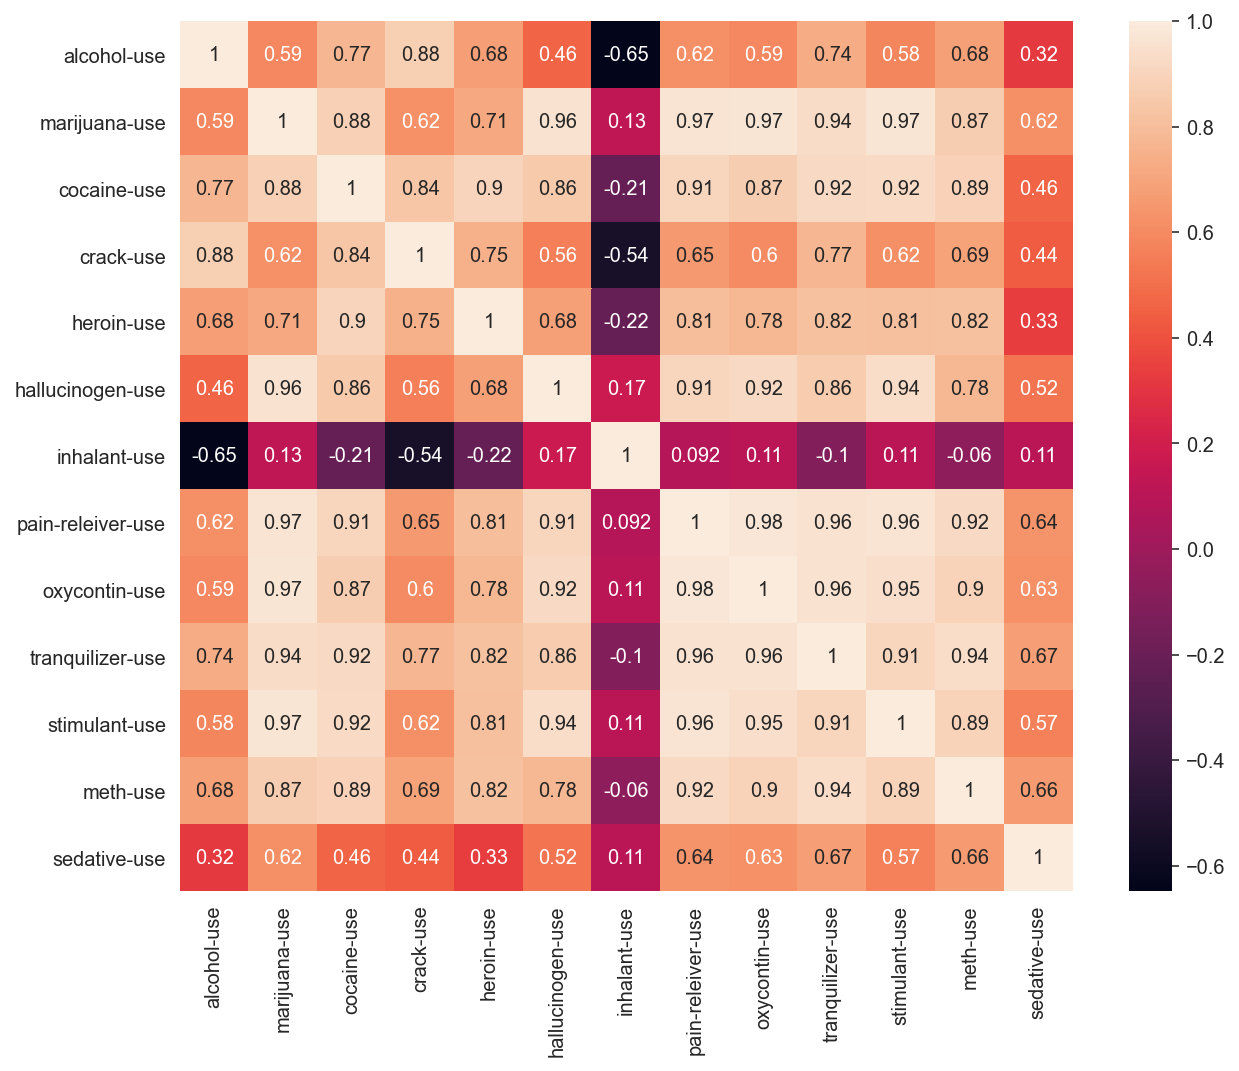

In [56]:
# check the correlations between each use 

plt.figure(figsize=(10, 8)) 

sns.heatmap(drug_use.corr(),annot=True)

##### Comment: 

While the alcohol and marijuana usage rate outperforms that of other drugs, the standardized version of the use data shows that the range is more evenly distributed compare to the standardized frequency data. 

The top three means of usage are alcohol, marijuana and pain-releiver. 

Most of the drug usage are correlated with each other, especially the use of marijuana are strongly related to the use of hallucinogen, pain-releiver, oxycontin and stimulant (all above 0.95). On the other hand, inhalant usage doesn't correlated with other drug use. It is worthwhile to draw more insights from the correlation matrix of the drug use. 


### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**

H0: There's no correlations between people's age and the top three drug uses. 


H1: There's correlations between people's age and the top three drug uses. 

In [57]:
# check the age variable and the top three drug uses 

age_use = drug_use_by_age[['age','alcohol-use', 'marijuana-use', 'pain-releiver-use']]

age_use

,age,alcohol-use,marijuana-use,pain-releiver-use
0,12.0,3.9,1.1,2.0
1,13.0,8.5,3.4,2.4
2,14.0,18.1,8.7,3.9
3,15.0,29.2,14.5,5.5
4,16.0,40.1,22.5,6.2
5,17.0,49.3,28.0,8.5
6,18.0,58.7,33.7,9.2
7,19.0,64.6,33.4,9.4
8,20.0,69.7,34.0,10.0
9,21.0,83.2,33.0,9.0


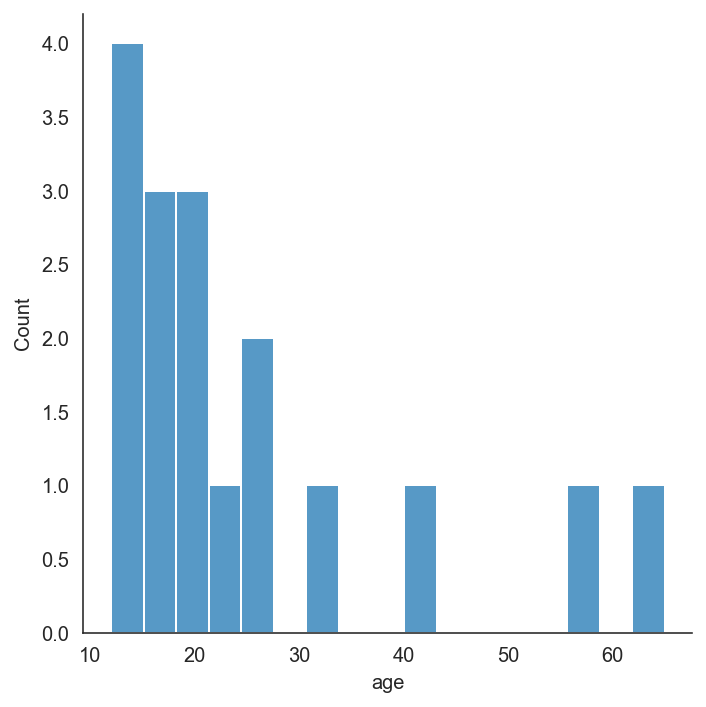

In [58]:
# check the histogram of the age variable

sns.displot(drug_use_by_age.age, bins = 17)

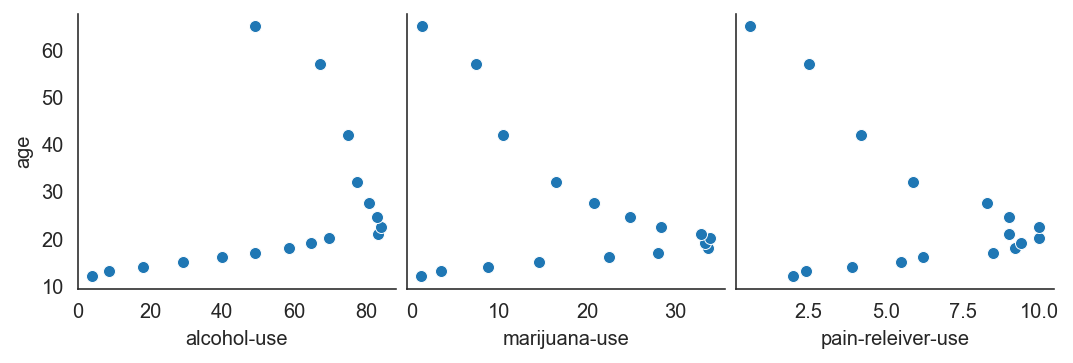

In [59]:
# pairplot of alcohol use, marijuana use and pain releiver use against age

sns.pairplot(data=drug_use_by_age, x_vars=(['alcohol-use', 'marijuana-use', 'pain-releiver-use']) ,y_vars=['age'], diag_kind = None)

In [60]:
# show the statistical information of these four variables 

age_use.describe()

,age,alcohol-use,marijuana-use,pain-releiver-use
count,17.000000,17.000000,17.000000,17.000000
mean,25.617647,55.429412,18.923529,6.270588
std,15.356726,26.878866,11.959752,3.166379
min,12.000000,3.900000,1.100000,0.600000
25%,16.000000,40.100000,8.700000,3.900000
50%,20.000000,64.600000,20.800000,6.200000
75%,27.500000,77.500000,28.400000,9.000000
max,65.000000,84.200000,34.000000,10.000000


Text(0.5, 1.0, 'Alcohol-Use by Age')

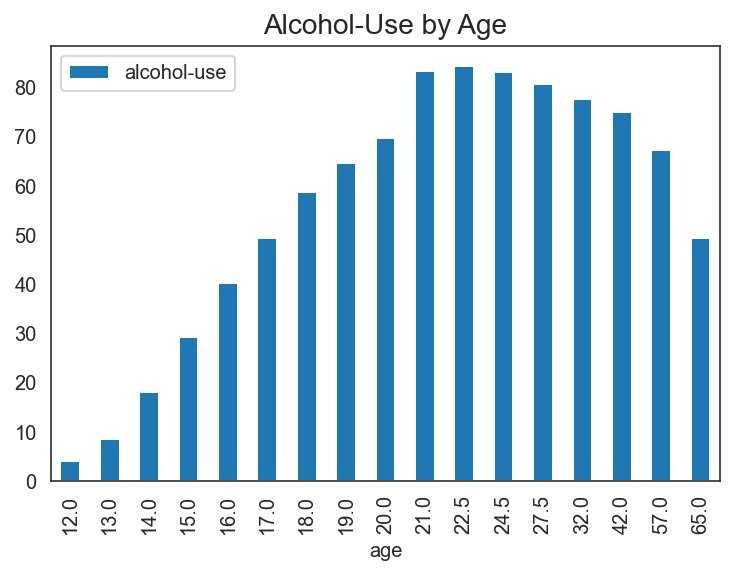

In [61]:
# show the alcohol use rate by age

drug_use_by_age.plot('age', 'alcohol-use', kind='bar')

plt.title('Alcohol-Use by Age', fontsize=14)

Text(0.5, 1.0, 'Marijuana-Use by Age')

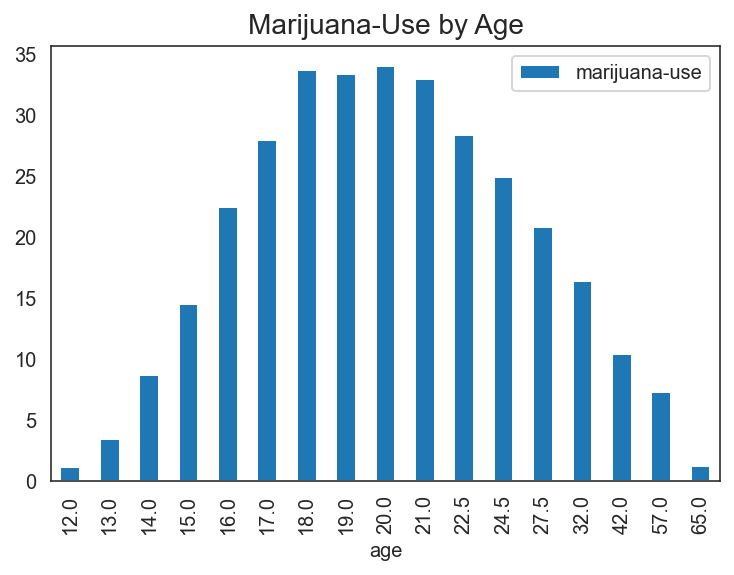

In [62]:
# show the marijuana use rate by age

drug_use_by_age.plot('age', 'marijuana-use', kind='bar')

plt.title('Marijuana-Use by Age', fontsize=14)

Text(0.5, 1.0, 'Pain-Releiver-Use by Age')

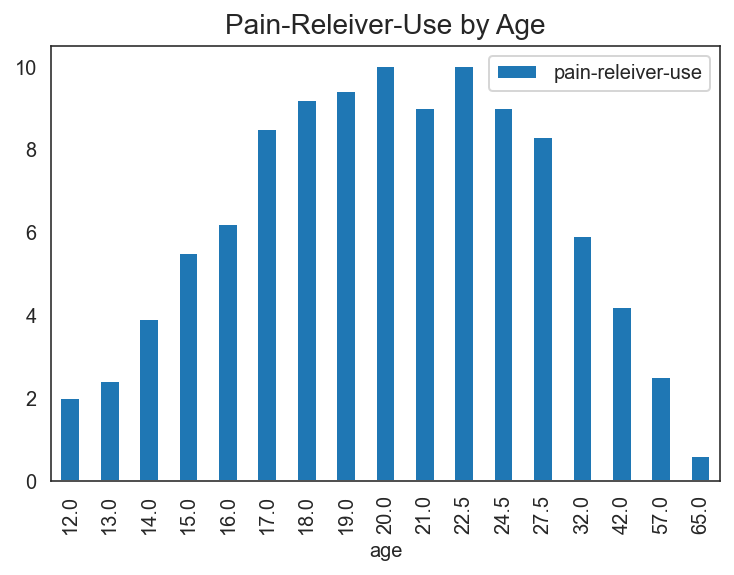

In [63]:
# show the marijuana use rate by age

drug_use_by_age.plot('age', 'pain-releiver-use', kind='bar')

plt.title('Pain-Releiver-Use by Age', fontsize=14)

In [64]:
# check the correlation between each variables and focus on the first column for now

age_use.corr()

,age,alcohol-use,marijuana-use,pain-releiver-use
age,1.000000,0.367742,-0.380299,-0.438547
alcohol-use,0.367742,1.000000,0.594165,0.617523
marijuana-use,-0.380299,0.594165,1.000000,0.966226
pain-releiver-use,-0.438547,0.617523,0.966226,1.000000


<AxesSubplot:>

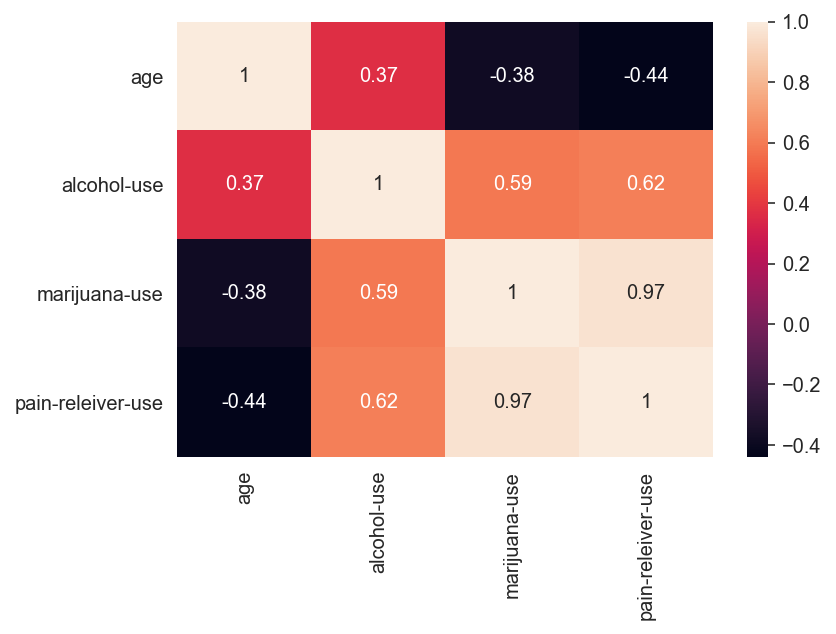

In [65]:
# visualise the correlation matrix  

plt.figure(figsize=(6, 4)) 

sns.heatmap(age_use.corr(),annot=True)

### Report

The hypothesis comparing the relationship between people's age and the top three drug uses. 

The independent variable in this hypothesis is age, and the histogram of the age is postively skewed, with the highest count before 30 years old. 

Although the correlation matrix does not indicate a strong relationship between the age and the three drug usages, the pairplot and the bar graphs indicate a similar pattern between age and drug use - all three drug uses increase from teenager to the peak of late 20s, and drop significantly after 30 years old. 

The correlation between each drug use is also worth to discover. However, for this findings, the null hypothesis has been rejected because there are clear relationships between the use and age. 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

Text(0.5, 1.0, 'Rate Variable Distribution')

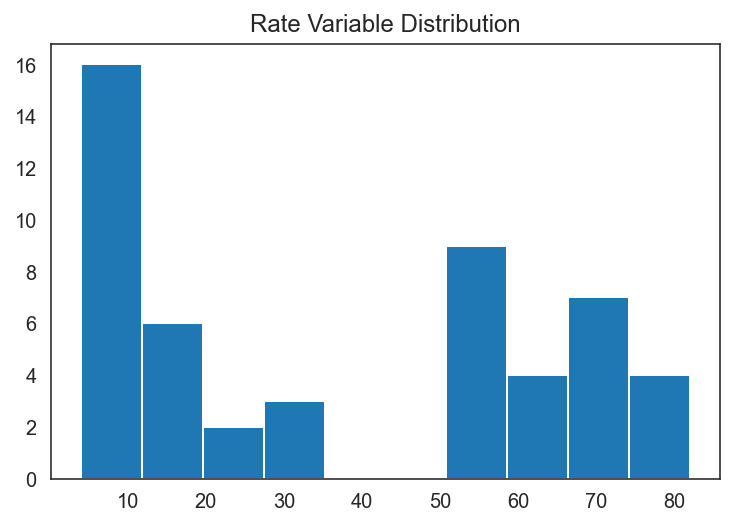

In [66]:
# plot the Rate distribution 

plt.hist(SAT_scores.Rate)
plt.title('Rate Variable Distribution')

In [67]:
# check the statistical information for Rate

SAT_scores.Rate.describe()

count    51.000000
mean     37.000000
std      27.550681
min       4.000000
25%       9.000000
50%      33.000000
75%      64.000000
max      82.000000
Name: Rate, dtype: float64

/Users/anita/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rate'>

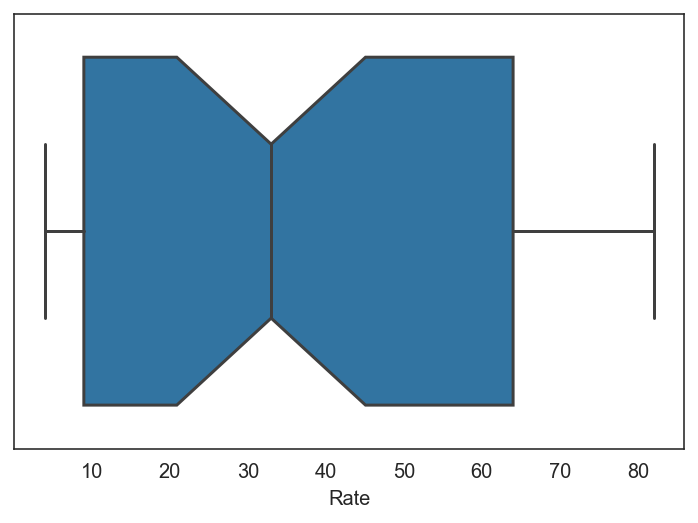

In [68]:
# check the boxplot for Rate

sns.boxplot(SAT_scores.Rate, notch = True)

##### Comment: 

The histogram of Rate shows a bimodal distribution. The mean is 37 and the standard deviation is 27. 

For Gaussian distribution, the three standard deviations from the mean is a common threshold for identifying outliers. In this case is 37 +/- (27 * 3), which is [-44, 118]. In other words, any data below -44 or above 118 can be considered as outlier.

Comparing the threshold calculated above and the histogram of Rate distribution, there is no outliers. This can be verified by the boxplot as well. 

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [71]:
spearman = SAT_scores[['Verbal', 'Math']].corr(method='spearman')
spearman

,Verbal,Math
Verbal,1.000000,0.909413
Math,0.909413,1.000000


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [75]:
SAT_scores['Rate_Percentile'] = [stats.percentileofscore(list(SAT_scores['Rate']),i) for i in list(SAT_scores['Rate'])]
SAT_scores.head()

,State,Rate,Verbal,Math,diff_verbal_math,diff_math_verbal,Rate_Percentile
21,HI,52,485,515,-30,30,58.823529
23,CA,51,498,517,-19,19,55.882353
1,NJ,81,499,513,-14,14,98.039216
33,IL,12,576,589,-13,13,34.313725
44,WI,6,584,596,-12,12,12.745098


In [76]:
SAT_scores.loc[SAT_scores['State'] == 'CA']

,State,Rate,Verbal,Math,diff_verbal_math,diff_math_verbal,Rate_Percentile
23,CA,51,498,517,-19,19,55.882353


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.